In [10]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# OpenCV

## 计算机眼中的图像：计算机视觉

**Def 1.1.1 RGB颜色通道与RGB值** 一张**彩色图片**通常是由很多微小的彩色像素 **(pixels)** 组成的，这些像素的颜色又由一个三元数组 **(R,G,B)** 决定。其中R,G,B分别代表红，绿，蓝的三原色通道 **(channels)**；数组 **(R,G,B)** 的值代表在对应颜色通道上的亮度，取值范围 **0 ~ 255**，越大的值代表**越高的亮度**。一般我们用**三张同样大小的矩阵**来代表一张彩色图片，如下图所示；特别的，一张黑白图片**(灰度图)**只有一条颜色通道。

<div align="center">
<img src=https://pic4.zhimg.com/80/v2-94eda292fdc88e4aa34b351d4b1be963_720w.webp width=60% height=60%/>
</div>

## OpenCV库 (cv2)

OpenCV的全称是 **Open Source Computer Vision Library**，是一个跨平台的计算机视觉库，可以在商业和研究领域中免费使用。OpenCV可用于开发实时的图像处理、计算机视觉以及模式识别程序。在Python中使用OpenCV，首先导入**cv2**库。

In [11]:
import cv2

### 图像读取与输出

In [12]:
# 读取图片
img = cv2.imread('./Notes_OpenCV/Lenna.png') # 以3DArray的形式返回图片的BGR矩阵
B = img[:,:,0] # B
G = img[:,:,1] # G
R = img[:,:,2] # R 

# 等价操作
B, G, R = cv2.split(img)

# 逆向操作
img_merge = cv2.merge((B,G,R)) # 注意(B,G,R)外有括号

# 生成图像副本
img_copy = img.copy() # 实际上是numpy中array的复制

注意此处，**cv2.imread(filename, flags=None)** 返回的是 <span style="color: red;">**(B,G,R)**</span> 而不是 **(R,G,B)**，但  **matplotlib** 里面是 **(R,G,B)**。此外，我们还可以通过参数 **flags** 设定读入图片的格式：   
**cv2.IMREAD_COLOR**    ：读入一副彩色图像。图像的透明度会被忽略，这是默认参数    
**cv2.IMREAD_GRAYSCALE**：以灰度模式读入图像，此时仅返回一个矩阵   
**cv2.IMREAD_UNCHANGED**：保留读取图片原有的颜色通道     

In [7]:
# 显示图片
def cv_show(name, img, wait_time=5000):
    cv2.imshow(name, img)   # 在窗口中显示图像，窗口名称为 name (str)，这里可以通过imutils模块改变图像显示大小
    cv2.waitKey(wait_time)  # 窗口显示时间，毫秒级；wait_time = 0 表示按任意键关闭窗口，不主动关闭
    cv2.destroyAllWindows() # 关闭时同时关闭所有窗口
    return
    
cv_show('Lenna', img)   

**cv2.imshow(name, img)**   中的参数二**img**为图像对象，类型是numpy中的ndarray类型   
**cv2.waitKey(wait_time)**  中的参数取 **wait_time = 0** 表示按任意键关闭窗口，不主动关闭，它必须接在 **cv2.imshow** 后面
**cv2.destroyAllWindows()** 指定关闭窗口的操作必须接在 **cv2.waitKey** 后面  
     
实际上，**cv2.waitKey(wait_time)** 的本质是表示<span style="color: red;">**暂停程序，在wait_time期间等待一个按键输入**</span>，如果超出预期时间，则跳过该行代码继续运行；**wait_time = 0** 实际表示**无限期暂停程序直至接收到按键输入**。同时，**cv2.waitKey(wait_time)** 也有返回值，如果在规定时间内接收到按键输入，则返回值为输入按键的**ASCII码**，否则返回**-1**，见下方代码：

In [61]:
def cv_show(name, img, wait_time=5000):
    cv2.imshow(name, img)  
    inputKey = cv2.waitKey(wait_time)  # 输出在在wait_time期间接收到的按键输入
    cv2.destroyAllWindows() 
    return inputKey                    # 输出在在wait_time期间接收到的按键输入
    
cv_show('Lenna', img)                  

27

在上述代码块图片展示期间，按ESC键退出，所以返回值为27（ESC键对应的ASCII码）。

当然，也可以使用 **matplotlib** 显示图片，采用 **plt.imshow(img_RGB)** 即可，但注意，**img_RGB** 是一个表示 <span style="color: red;">**(R,G,B)**</span> 的3DArray，而非 **cv2.imread(filename, flags=None)** 返回的 <span style="color: red;">**(B,G,R)**</span>，利用 **cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)** 可以实现二者的转换：

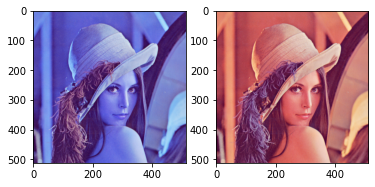

In [20]:
plt.subplot(121) # 左图为没有经过转换的输出
plt.imshow(img);
plt.subplot(122) # 右图为经过转换的输出
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [11]:
# 保存图片
imgGray = cv2.imread('./Notes_OpenCV/Lenna.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./Notes_OpenCV/Lenna_Gray.png', imgGray)

True

### 视频的读取与输出

视频的实际上是有多张静态图片，即 **帧 (frame)** 组合而成，读取视频相当于读取一条图片序列

In [6]:
# 读取视频
videoCap = cv2.VideoCapture('./Notes_OpenCV/Ocean.mp4') # 初始化读取视频（摄像头）
videoCap.isOpened()                                     # 检查初始化摄像头是否成功，否则下面的代码都会报错

True

**videoCap.isOpened()** 会返回一个布尔值，判断当前的摄像头是否初始化成功，如果摄像头初始化失败，我们可以使用 **videoCap.open()** 函数来打开摄像头。我们将读取视频的整个过程封装成如下函数

In [7]:
def read_video(video_path):  
    frames = []                             # 用于保存读取的帧
    videoCap = cv2.VideoCapture(video_path) # 初始化读取视频（摄像头）
    isOpen = videoCap.isOpened()            # 检查初始化摄像头是否成功，否则下面的代码都会报错
    
    while isOpen:
        isOpen , frame = videoCap.read()    # 读取下一帧
        if isOpen:
            frames.append(frame)            # 添加该帧
        
    videoCap.release()                      # 关闭视频文件或相机设备
    return frames

**videoCap = cv2.VideoCapture(video_path)** -- 初始化所读取的视频     
**videoCap.isOpened()** -- 返回一个布尔值，判断当前的视频是否初始化成功    
**videoCap.read()** -- 返回一个布尔值 **isOpen** 表示帧是否被正确读取,可以通过检查这个返回值来判断视频是否结束；一个被读取帧的BGRarray **frame**     
**videoCap.release()** -- 用于关闭视频文件或相机设备，常用于结束对视频的操作时

In [8]:
# 显示视频
def frames_show(name, frames, wait_time=100):
    for frame in frames:
        cv2.imshow(name, frame)
        inputKey = cv2.waitKey(wait_time)
        if  inputKey == 27 :
            break
    cv2.destroyAllWindows() 
    return

In [16]:
# 将所有帧转为灰度图
frames = read_video('./Notes_OpenCV/Ocean.mp4')
Grayframes = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames] # cv2.cvtColor()可以实现图片的各种转换

# 尝试调节不同的wait_time以实现视频的加减速
frames_show('Ocean_Gray_wait_time_10', Grayframes, wait_time=10)
frames_show('Ocean_Gray_wait_time_50', Grayframes, wait_time=50)

为了方便视频的保存，通常将读取帧和显示帧的操作置于同一循环下。